In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [24]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')
df.head()
# df.shape

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [26]:
df.duplicated().sum()

0

In [27]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [28]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [29]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [30]:
df.drop(columns=['RowNumber','CustomerId', 'Surname'], inplace = True)

In [31]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first = True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [34]:
X = df.drop(columns=["Exited"])
y = df["Exited"]

In [35]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [36]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [38]:
X_train.shape

(8000, 11)

In [39]:
y_train.shape

(8000,)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [43]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [44]:
model = Sequential()

model.add(Dense(11,activation="relu", input_dim = 11))
model.add(Dense(11,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

In [47]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7420 - loss: 0.5780 - val_accuracy: 0.7975 - val_loss: 0.4697
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8048 - loss: 0.4435 - val_accuracy: 0.8031 - val_loss: 0.4430
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8162 - loss: 0.4289 - val_accuracy: 0.8138 - val_loss: 0.4327
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8164 - loss: 0.4222 - val_accuracy: 0.8175 - val_loss: 0.4254
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8163 - loss: 0.4286 - val_accuracy: 0.8219 - val_loss: 0.4174
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8257 - loss: 0.4148 - val_accuracy: 0.8244 - val_loss: 0.4104
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8418 - loss: 0.3881 - val_accuracy: 0.8306 - val_loss: 0.4031
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8380 - loss: 0.4007 - val_accu

In [48]:
model.layers[0].get_weights()

[array([[ 0.06383308, -0.0374331 ,  0.28688464, -0.02280612, -0.09843055,
         -0.07994786,  0.06037429, -0.03136308,  0.00387609, -0.15989643,
          0.18403062],
        [ 0.18955135,  0.51657563, -0.9502496 , -0.72887826,  1.1453699 ,
          0.10243841, -0.50786275, -0.69888353, -0.3764505 , -0.5068658 ,
         -0.31393066],
        [ 0.10417202, -0.03253625,  0.06981556, -0.17332345,  0.03455567,
         -0.24699181,  0.28122228, -0.00223833, -0.1135156 , -0.24844426,
          0.10437384],
        [-0.02955882, -0.21333382,  0.37941584, -0.01766719,  0.07031983,
          0.3688084 , -1.2120876 ,  0.31532842, -0.1642072 ,  0.78524727,
         -0.22344634],
        [ 0.9689369 , -1.0033768 , -0.09643055,  0.2683887 ,  0.30587116,
          0.05695264,  0.61691904, -0.08737792,  0.13874389,  0.94959706,
          0.534034  ],
        [ 0.01779086, -0.10406711,  0.12316194, -0.04291939,  0.29511014,
          0.13266692,  0.24021372,  0.13818054,  0.28916317,  0.0398609

In [49]:
model.layers[1].get_weights()

[array([[-0.91306865, -0.03378   , -1.0693033 ,  1.1362042 ,  0.3348368 ,
          0.1789936 , -0.34037948,  1.5816689 ,  1.0076487 , -0.3753762 ,
         -0.53236336],
        [ 0.05903719,  0.41089278,  0.03083874,  0.6172814 ,  0.21078683,
         -0.8477059 , -0.4072862 ,  0.39904058,  0.6187163 , -0.09851017,
         -0.24053589],
        [-0.33480358,  0.60161513,  0.15327542, -0.2532704 , -0.5143233 ,
         -0.3302787 ,  0.2804207 ,  0.15917869, -0.03328497, -0.63712746,
          0.21788998],
        [-0.24898547, -0.53898406,  0.3331739 , -0.23962305,  0.36459905,
          0.4119956 , -0.43351427, -0.38042638, -0.9687012 ,  0.4385793 ,
         -0.65061367],
        [-0.3291125 ,  0.08248309,  0.52976465,  0.6015288 ,  0.7637107 ,
          0.1244596 , -0.4701946 ,  0.10970151, -0.4477649 , -0.44310027,
          0.76414657],
        [-0.00530673,  0.01645543, -0.22310257, -0.16993693, -0.36354306,
         -0.10514602, -0.15338902,  0.06978439,  0.33326522, -0.1737672

In [50]:
model.layers[2].get_weights()

[array([[-0.1067122 ],
        [-0.3441867 ],
        [-0.2814493 ],
        [ 1.0938398 ],
        [-1.0531076 ],
        [-0.636476  ],
        [-0.95962495],
        [ 0.8627646 ],
        [ 0.77149063],
        [-0.6853152 ],
        [-1.0083069 ]], dtype=float32),
 array([-0.08948273], dtype=float32)]

In [51]:
model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.02986243],
       [0.10924008],
       [0.06170279],
       ...,
       [0.01040387],
       [0.02199147],
       [0.41930133]], dtype=float32)

In [52]:
y_log = model.predict(X_test_scaled) 

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [53]:
y_pred = np.where(y_log>0.5,1,0)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8615

In [55]:
import matplotlib.pyplot as plt

In [56]:
history.history

{'accuracy': [0.7809374928474426,
  0.800000011920929,
  0.8121874928474426,
  0.8192187547683716,
  0.8232812285423279,
  0.8293750286102295,
  0.8337500095367432,
  0.8403124809265137,
  0.8470312356948853,
  0.8509374856948853,
  0.8545312285423279,
  0.8576562404632568,
  0.8579687476158142,
  0.8595312237739563,
  0.8609374761581421,
  0.8614062666893005,
  0.8592187762260437,
  0.8612499833106995,
  0.862500011920929,
  0.860156238079071,
  0.8617187738418579,
  0.8623437285423279,
  0.8618749976158142,
  0.8628125190734863,
  0.8620312213897705,
  0.8618749976158142,
  0.8631250262260437,
  0.864062488079071,
  0.8643749952316284,
  0.8637499809265137,
  0.8656250238418579,
  0.864062488079071,
  0.8656250238418579,
  0.8645312786102295,
  0.8635937571525574,
  0.8628125190734863,
  0.8653125166893005,
  0.866406261920929,
  0.86328125,
  0.8643749952316284,
  0.8660937547683716,
  0.8653125166893005,
  0.8646875023841858,
  0.8648437261581421,
  0.8667187690734863,
  0.86468750

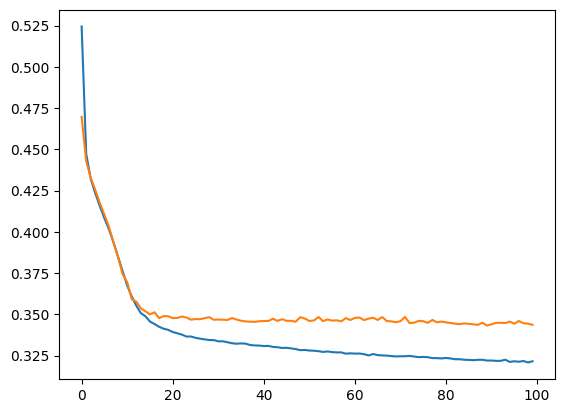

In [57]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

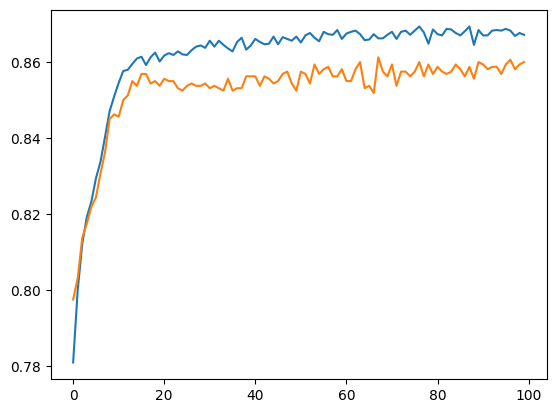

In [58]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])